In [1]:
from astroquery.simbad import Simbad
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import sys

%matplotlib inline

/Users/katiemel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Only string based array is star_names. Everything else should have zeros where there is a missing value
star_names = np.genfromtxt("star_names.txt", dtype='str', missing_values = ('--'), filling_values=(np.nan))
RV = np.genfromtxt("RVs.txt", usecols=1, skip_header=2, missing_values = ('--'), filling_values=(np.nan))

newt_Ha = np.genfromtxt("Comparisons/Newton.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
newt_Ha_err = np.genfromtxt("Comparisons/Newton.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
ad_logRHK = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_err = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
ad_S = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
ad_S_err = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

all_k_flux = np.genfromtxt("photometry.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
all_k_err = np.genfromtxt("photometry.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
all_v_flux = np.genfromtxt("photometry.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
all_v_err = np.genfromtxt("photometry.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

h_alpha = np.genfromtxt("Results/halpha.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
h_alpha_err = np.genfromtxt("Results/halpha.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
s_index = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
s_index_err = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_err = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))
log_s_index = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[4], missing_values = ('--'), filling_values=(np.nan))
log_s_index_err = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[5], missing_values = ('--'), filling_values=(np.nan))
log_rhk_prime_index = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[6], missing_values = ('--'), filling_values=(np.nan))
log_rhk_prime_index_err = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[7], missing_values = ('--'), filling_values=(np.nan))

"""
star_names = np.genfromtxt("short_star_names.txt", dtype='str', missing_values = ('--'), filling_values=(np.nan))
RV = np.genfromtxt("short_RVs.txt", missing_values = ('--'), filling_values=(np.nan))

newt_Ha = np.genfromtxt("Comparisons/short_Newton.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
newt_Ha_err = np.genfromtxt("Comparisons/short_Newton.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
ad_logRHK = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_err = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
ad_S = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
ad_S_err = np.genfromtxt("Comparisons/short_AstudilloDefru.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

all_k_flux = np.genfromtxt("short_photometry.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
all_k_err = np.genfromtxt("short_photometry.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
all_v_flux = np.genfromtxt("short_photometry.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
all_v_err = np.genfromtxt("short_photometry.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

h_alpha = np.genfromtxt("Results/short_halpha.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
h_alpha_err = np.genfromtxt("Results/short_halpha.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
s_index = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
s_index_err = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_err = np.genfromtxt("Results/short_cahk_s_rhk.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))
"""

SiIII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=2, usecols=[0], missing_values = ('--'), filling_values=(np.nan))
SiIII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[1], missing_values = ('--'), filling_values=(np.nan))
LyA_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[2], missing_values = ('--'), filling_values=(np.nan))
LyA_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[3], missing_values = ('--'), filling_values=(np.nan))
SiII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[4], missing_values = ('--'), filling_values=(np.nan))
SiII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[5], missing_values = ('--'), filling_values=(np.nan))
CII_flux =np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[6], missing_values = ('--'), filling_values=(np.nan))
CII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[7], missing_values = ('--'), filling_values=(np.nan))
MgII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[8], missing_values = ('--'), filling_values=(np.nan))
MgII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[9], missing_values = ('--'), filling_values=(np.nan))
SiIV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[10], missing_values = ('--'), filling_values=(np.nan))
SiIV_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[11], missing_values = ('--'), filling_values=(np.nan))
HeII_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[12], missing_values = ('--'), filling_values=(np.nan))
HeII_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[13], missing_values = ('--'), filling_values=(np.nan))
CIV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[14], missing_values = ('--'), filling_values=(np.nan))
CIV_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[15], missing_values = ('--'), filling_values=(np.nan))
NV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[16], missing_values = ('--'), filling_values=(np.nan))
NV_flux_err = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[17], missing_values = ('--'), filling_values=(np.nan))
EUV_flux = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[18], missing_values = ('--'), filling_values=(np.nan))

dists = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[19], missing_values = ('--'), filling_values=(np.nan)) #parsecs
radii = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[20], missing_values = ('--'), filling_values=(np.nan)) #solar radii
temps = np.genfromtxt("uv_fluxes.txt", skip_header=5, usecols=[21], missing_values = ('--'), filling_values=(np.nan)) #kelvin

print(len(star_names))
print(len(RV))
print(len(SiII_flux))
print(len(s_index))
print(len(ad_logRHK))
print(len(dists))
print(len(radii))
print(len(temps))

107
107
107
107
107
107
107
107


In [3]:
num_spectra_ha = []
num_spectra_s = []
num_spectra_logrhk = []
for star in star_names:
    ha = np.genfromtxt("Results/%s_spectra_halpha.txt" % star, usecols=[0])
    s = np.genfromtxt("Results/%s_spectra_cahk.txt" % star, usecols=[0])
    rhk = np.genfromtxt("Results/%s_spectra_cahk.txt" % star, usecols=[2])
    
    len_ha = len(ha[ha!=0])
    len_s = len(s[s!=0])
    len_rhk = len(rhk[rhk>0])
    
    num_spectra_ha.append(len_ha)
    num_spectra_s.append(len_s)
    num_spectra_logrhk.append(len_rhk)
    
print(len(num_spectra_ha))

107


/Users/katiemel/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:1487: UserWarning: genfromtxt: Empty input file: "Results/2MASSJ02543316-5108313_spectra_halpha.txt"
  warnings.warn('genfromtxt: Empty input file: "%s"' % fname)
/Users/katiemel/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:1487: UserWarning: genfromtxt: Empty input file: "Results/2MASSJ02543316-5108313_spectra_cahk.txt"
  warnings.warn('genfromtxt: Empty input file: "%s"' % fname)
/Users/katiemel/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:1487: UserWarning: genfromtxt: Empty input file: "Results/2MASSJ02001277-0840516_spectra_halpha.txt"
  warnings.warn('genfromtxt: Empty input file: "%s"' % fname)
/Users/katiemel/anaconda/lib/python2.7/site-packages/numpy/lib/npyio.py:1487: UserWarning: genfromtxt: Empty input file: "Results/2MASSJ02001277-0840516_spectra_cahk.txt"
  warnings.warn('genfromtxt: Empty input file: "%s"' % fname)
/Users/katiemel/anaconda/lib/python2.7/site-packages/numpy/lib/n

In [4]:
all_names = ['star', 'RV', 'K', 'err_K', 'V', 'err_V',
             'H_alpha', 'H_alpha_err', 's', 's_err', 'rhk_prime', 'rhk_prime_err',
             'log_s', 'log_s_err', 'log_rhk_prime', 'log_rhk_prime_err',
             'SiIII', 'SiIII_err', 'LyA', 'LyA_err','SiII', 'SiII_err', 
             'CII', 'CII_err', 'MgII', 'MgII_err', 'SiIV', 'SiIV_err', 'HeII', 'HeII_err', 
             'CIV', 'CIV_err', 'NV', 'NV_err', 'EUV', 'dist', 'radius', 'teff', 
             'newt_Ha', 'newt_Ha_err', 'ad_logRHK', 'ad_logRHK_err', 'ad_S', 'ad_S_err', 
             "num_spectra_ha", "num_spectra_s", "num_spectra_logrhk"]
data = Table({'star': star_names, 
              'RV': RV,
              'K': all_k_flux, 'err_K': all_k_err, 
              'V': all_v_flux, 'err_V': all_v_err, 
              'H_alpha': h_alpha, 'H_alpha_err': h_alpha_err,
              's': s_index, 's_err': s_index_err,
              'rhk_prime': rhk_prime_index, 'rhk_prime_err': rhk_prime_index_err,
              'log_s': log_s_index, 'log_s_err': log_s_index_err,
              'log_rhk_prime': log_rhk_prime_index, 'log_rhk_prime_err': log_rhk_prime_index_err,
              'SiIII': SiIII_flux, 'SiIII_err': SiIII_flux_err,
              'LyA': LyA_flux, 'LyA_err': LyA_flux_err,
              'SiII': SiII_flux, 'SiII_err': SiII_flux_err,
              'CII': CII_flux, 'CII_err': CII_flux_err,
              'MgII': MgII_flux, 'MgII_err': MgII_flux_err,
              'SiIV': SiIV_flux, 'SiIV_err': SiIV_flux_err,
              'HeII': HeII_flux, 'HeII_err': HeII_flux_err,
              'CIV': CIV_flux, 'CIV_err': CIV_flux_err,
              'NV': NV_flux, 'NV_err': NV_flux_err,
              'EUV': EUV_flux, 
              'dist': dists, 'radius': radii, 'teff': temps, 
              'newt_Ha': newt_Ha, 'newt_Ha_err': newt_Ha_err, 
              'ad_logRHK': ad_logRHK, 'ad_logRHK_err': ad_logRHK_err, 
              'ad_S': ad_S, 'ad_S_err': ad_S_err,
              'num_spectra_ha': num_spectra_ha, 'num_spectra_s': num_spectra_s, 
              'num_spectra_logrhk': num_spectra_logrhk}, names=all_names)

In [5]:
uv_lines = ["SiIII", "LyA", "SiII", "CII", "MgII", "SiIV", "HeII", "CIV", "NV", "EUV"]

for line in uv_lines:
    #convert flux to luminosity for each line
    luminosities = data[line] * 4 * np.pi * np.array(data["dist"])**2 * 3e18**2
    data['%s_lum' % line] = luminosities

    #convert luminosity to surface flux for each star
    surface_flux = luminosities / (4 * np.pi * np.array(data["radius"])**2 * 6.96e10**2)
    data['%s_surface_flux' % line] = surface_flux
    
    #error analysis (different for EUV -- no errors provided so just 0)
    if line != "EUV":
        lum_err = (data['%s_err' % line])**2 * (4*np.pi*np.array(data["dist"])**2*3e18**2)**2
        data['%s_lum_err' % line] = np.sqrt(lum_err)
        surface_flux_err = (lum_err)**2 * (1/(4*np.pi*np.array(data["radius"])**2*6.96e10**2)**2)
        data['%s_surface_flux_err' % line] = np.sqrt(surface_flux_err)
        
    else:
        data['%s_lum_err' % line] = np.zeros(len(star_names))
        data['%s_surface_flux_err' % line] = np.zeros(len(star_names))
        
#print(data["EUV_lum_err"])
#print(data["EUV_surface_flux_err"])

#print(data['s_err'][data['star']=='GJ176'])

In [6]:
#print(data)
ascii.write(data, 'ALL_DATA.dat', overwrite=True)
#print(data['SiIII_lum'][data['star']=='GJ176']) #example of subsetting the data
#print(data['H_alpha'][data['star']=='K2-25'])

In [7]:
test = ascii.read("ALL_DATA.dat", fill_values=[(0.0, "--")])
print(test.dtype.names)
print(test[0])
#print(test)
#print(test["SiIII_lum"])
#print(test["num_spectra_logrhk"])

('star', 'RV', 'K', 'err_K', 'V', 'err_V', 'H_alpha', 'H_alpha_err', 's', 's_err', 'rhk_prime', 'rhk_prime_err', 'log_s', 'log_s_err', 'log_rhk_prime', 'log_rhk_prime_err', 'SiIII', 'SiIII_err', 'LyA', 'LyA_err', 'SiII', 'SiII_err', 'CII', 'CII_err', 'MgII', 'MgII_err', 'SiIV', 'SiIV_err', 'HeII', 'HeII_err', 'CIV', 'CIV_err', 'NV', 'NV_err', 'EUV', 'dist', 'radius', 'teff', 'newt_Ha', 'newt_Ha_err', 'ad_logRHK', 'ad_logRHK_err', 'ad_S', 'ad_S_err', 'num_spectra_ha', 'num_spectra_s', 'num_spectra_logrhk', 'SiIII_lum', 'SiIII_surface_flux', 'SiIII_lum_err', 'SiIII_surface_flux_err', 'LyA_lum', 'LyA_surface_flux', 'LyA_lum_err', 'LyA_surface_flux_err', 'SiII_lum', 'SiII_surface_flux', 'SiII_lum_err', 'SiII_surface_flux_err', 'CII_lum', 'CII_surface_flux', 'CII_lum_err', 'CII_surface_flux_err', 'MgII_lum', 'MgII_surface_flux', 'MgII_lum_err', 'MgII_surface_flux_err', 'SiIV_lum', 'SiIV_surface_flux', 'SiIV_lum_err', 'SiIV_surface_flux_err', 'HeII_lum', 'HeII_surface_flux', 'HeII_lum_err', 

## Make Table 1:

Targets, RV, **RV source**, V band, V err, **V sources**, K band, K err, **K sources**, **(same with all the UV fluxes**, number of spectra used, **spectra source(s), spectral type**

In [57]:
table1_names = ['star', 'RV', 'K', 'err_K', 'V', 'err_V']
table1 = Table({'star': star_names, 
              'RV': RV,
              'K': np.round(all_k_flux, 3), 'err_K': np.round(all_k_err, 3), 
              'V': np.round(all_v_flux, 3), 'err_V': np.round(all_v_err, 3)}, names=table1_names)

table1 = Table({'star': test["star"], 
              'RV': test["RV"],
              'K': np.round(test["K"], 3), 'err_K': np.round(test["err_K"], 3), 
              'V': np.round(test["V"], 3), 'err_V': np.round(test["err_V"], 3)}, names=table1_names)

ascii.write(table1, sys.stdout, format='latex')

\begin{table}
\begin{tabular}{cccccc}
star & RV & K & err_K & V & err_V \\
GJ176 & 26.0 & 5.607 & 0.034 & 9.951 & 0.0 \\
GJ667C & 6.1 & 6.036 & 0.02 & 10.22 & 0.0 \\
GJ581 & -9.8 & 5.837 & 0.023 & 10.56 & 0.02 \\
GJ1214 & 16.0 & 8.782 & 0.02 & 14.67 & 0.0 \\
GJ832 & 12.8 & 4.501 & 0.018 & 8.672 & 0.0 \\
GJ876 & -2.1 & 5.01 & 0.021 & 10.192 & 0.002 \\
GJ436 & 10.0 & 6.073 & 0.016 & 10.613 & 0.01 \\
GJ628 & -21.6 & 5.075 & 0.024 & 10.072 & 0.002 \\
GJ887 & 9.5 & 3.46 & 0.2 & 7.34 & 0.0 \\
GJ1061 & 0.7 & 6.61 & 0.021 & 13.07 & 0.0 \\
HD173739 & -1.07 & 4.432 & 0.02 & 8.91 & 0.0 \\
GSC8056-0482 & 12.0 & 7.501 & 0.027 & 12.411 & 0.537 \\
2MASSJ02543316-5108313 & 13.8 & 7.79 & 0.03 & 12.21 & 0.0 \\
2MASSJ02001277-0840516 & 4.5 & 7.868 & 0.02 & 12.44 & 0.07 \\
G75-55 & -31.07 & 7.171 & 0.027 & 10.977 & 0.05 \\
2MASSJ22025453-6440441 & 2.2 & 8.157 & 0.033 & 12.683 & 0.0 \\
2MASSJ00240899-6211042 & 6.1 & 7.494 & 0.021 & 11.335 & 0.02 \\
2MASSJ01521830-5950168 & 10.3 & 8.138 & 0.029 & 12.54 & 0.

### Long

In [9]:
#Only string based array is star_names. Everything else should have zeros where there is a missing value

star_names_full = np.genfromtxt("star_names.txt", dtype='str', missing_values = ('--'), filling_values=(np.nan))
RV_full = np.genfromtxt("RVs.txt", missing_values = ('--'), filling_values=(np.nan))

newt_Ha_full = np.genfromtxt("Comparisons/Newton.txt", usecols=[0], dtype="str", missing_values = ('--'), filling_values=(np.nan))
newt_Ha_err_full = np.genfromtxt("Comparisons/Newton.txt", usecols=[1], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[0], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_logRHK_err_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[1], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_S_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[2], dtype="str", missing_values = ('--'), filling_values=(np.nan))
ad_S_err_full = np.genfromtxt("Comparisons/AstudilloDefru.txt", usecols=[3], dtype="str", missing_values = ('--'), filling_values=(np.nan))

all_k_flux_full = np.genfromtxt("photometry.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
all_k_err_full = np.genfromtxt("photometry.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
all_v_flux_full = np.genfromtxt("photometry.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
all_v_err_full = np.genfromtxt("photometry.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

h_alpha_full = np.genfromtxt("Results/halpha.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
h_alpha_err_full = np.genfromtxt("Results/halpha.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
s_index_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[0], missing_values = ('--'), filling_values=(np.nan))
s_index_err_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[1], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[2], missing_values = ('--'), filling_values=(np.nan))
rhk_prime_index_err_full = np.genfromtxt("Results/cahk_s_rhk.txt", usecols=[3], missing_values = ('--'), filling_values=(np.nan))

#print(len(star_names))
#print(len(newt_Ha))
#print(len(EUV_flux))
#print(len(s_index))

In [10]:
#Eventually will make graphs with all matching Newton and Astudillo-Defru targets to compare
#Will need to mask values that don't exist in their tables AND values where RV is zero (calculations will be incorrect for these)

## Comparison Tests:

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


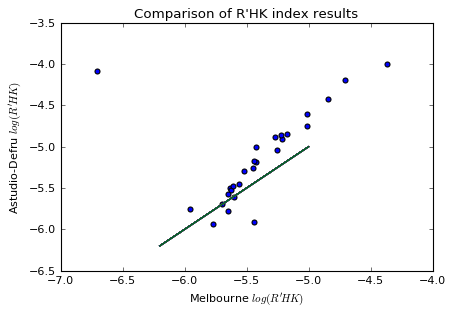

In [11]:
for i in range(len(test["ad_logRHK"])):
    value = test["ad_logRHK"][i]
    if value != 0.0:
        plt.scatter(np.log10(rhk_prime_index[i]), value)
        #plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
    plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
    plt.title("Comparison of R'HK index results")
    plt.xlabel("Melbourne $log(R'HK)$")
    plt.ylabel("Astudio-Defru $log(R'HK)$")

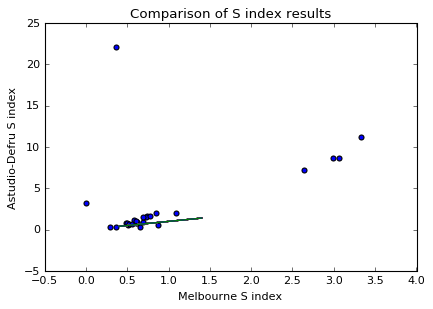

In [12]:
for i in range(len(test["s"])):
    value = test["ad_S"][i]
    if value != 0.0:
        plt.scatter(test["s"][i], value)
        #plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
    plt.plot(np.linspace(0.4,1.4),np.linspace(0.4,1.4))
    plt.title("Comparison of S index results")
    plt.xlabel("Melbourne S index")
    plt.ylabel("Astudio-Defru S index")

#### Attempting to apply masks!!! See below!!! Much excite!!!

[ True False  True False  True  True  True  True  True  True False False
 False False False False  True False False False False False False False
  True False  True  True  True  True  True False  True False  True False
 False  True  True  True  True  True  True  True  True  True False False]
[-4.91099977 -5.77600002 -5.18200016 -5.49599981 -5.45699978 -5.52299976
 -4.84299994 -5.75400019 -5.25600004 -5.91499996 -5.61299992 -5.9380002
 -5.04400015 -3.99499989 -5.00299978 -4.85699987 -4.07800007 -4.75199986
 -5.48000002 -5.296      -4.88500023 -5.69099998 -4.42799997 -5.57399988
 -4.59899998 -5.17799997]
[-5.21049019 -5.64545355 -5.42743053 -5.63132889 -5.56090516 -5.6223707
 -5.17341294 -5.95385506 -4.37357661        -inf        -inf        -inf
        -inf -4.8704424         -inf        -inf -4.9360487  -4.48582343
 -4.40036621 -4.34401611 -4.66287143        -inf        -inf        -inf
 -5.43945227 -5.14332782]


/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 107 but corresponding boolean dimension is 48
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 107 but corresponding boolean dimension is 48


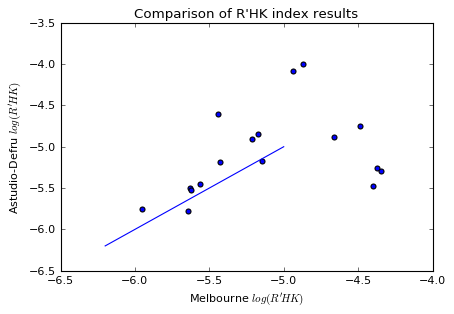

In [13]:
test = ascii.read("short_ALL_DATA.dat")#,fill_values=[(0.0, 'nan')]) 

bool_ad_logRHK = np.logical_and(test["ad_logRHK"] != 0.0, test["rhk_prime"] != 0)
print(bool_ad_logRHK)
ad_logRHK = np.array(test["ad_logRHK"])
print(ad_logRHK[bool_ad_logRHK])
print(np.log10(rhk_prime_index)[bool_ad_logRHK])

plt.scatter(np.log10(rhk_prime_index)[bool_ad_logRHK], ad_logRHK[bool_ad_logRHK])
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
plt.title("Comparison of R'HK index results")
plt.xlabel("Melbourne $log(R'HK)$")
plt.ylabel("Astudio-Defru $log(R'HK)$")

In [96]:
#Testing difference between voigt profile and gaussian

#convert flux to luminosity for each line
lum_gauss = data["SiIII"][0] * 4 * np.pi * np.array(data["dist"][0])**2 * 3e18**2
lum_voigt = 2.38E-15 * 4 * np.pi * np.array(data["dist"][0])**2 * 3e18**2
print(np.log10(lum_gauss), np.log10(lum_voigt))

#convert luminosity to surface flux for each star
sur_flux_gauss = lum_gauss / (4 * np.pi * np.array(data["radius"][0])**2 * 6.96e10**2)
sur_flux_voigt = lum_voigt / (4 * np.pi * np.array(data["radius"][0])**2 * 6.96e10**2)
print(np.log10(sur_flux_gauss), np.log10(sur_flux_voigt))
        
#print(data["EUV_lum_err"])
#print(data["EUV_surface_flux_err"])

#print(data['s_err'][data['star']=='GJ176'])

print(data["SiIII"][0])

(25.338590791383574, 25.38272928852448)
(3.2477374205896652, 3.2918759177305721)
2.15e-15
